In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [6]:
sns.set(font_scale=1)
sns.set_style("ticks")

In [7]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [8]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:]

In [9]:
sliced_data = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

In [10]:
sliced_data['co2flux_cpl'] = sliced_data['co2flux_cpl'] * 86400 # kg / m-2 / d-1 

In [11]:
sliced_data.co2flux_cpl

<xarray.DataArray 'co2flux_cpl' (time_counter: 1020, y: 114, x: 71)>
array([[[            nan, -1.69050417e-04, -1.69050417e-04, ...,
                     nan,             nan,             nan],
        [            nan, -2.13722589e-04, -2.13600467e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [            nan, -2.28940808e-04, -2.28940808e-04, ...,
         -2.27929483e-04, -2.27929483e-04, -2.27929483e-04],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan, -2.72305805e-04, -2.72305805e-04, ...,
                     nan,             nan,             nan],
        [            nan, -3.41481505e-04, -3.41292397e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [            nan, -3.65047205e-04, -3.65047205e-04, ...,
         -3.89266521e-04, -3.89266521e-04, -3.89266521e-04],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan, -1.34951001e-05, -1.34951001e-05, ...,
                     nan,             nan,             nan],
        [            nan, -1.43119634e-04, -1.42765273e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [            nan, -1.87278099e-04, -1.87278099e-04, ...,
         -9.47566094e-05, -9.47566094e-05, -9.47566094e-05],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
    nav_lat        (y, x) float32 35.13 35.13 35.13 35.13 ... 67.27 67.13 66.99
    nav_lon        (y, x) float32 -25.24 -24.74 -24.24 ... 22.95 23.49 24.03
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-01-16T12:00:00 ... 2099...
Dimensions without coordinates: y, x

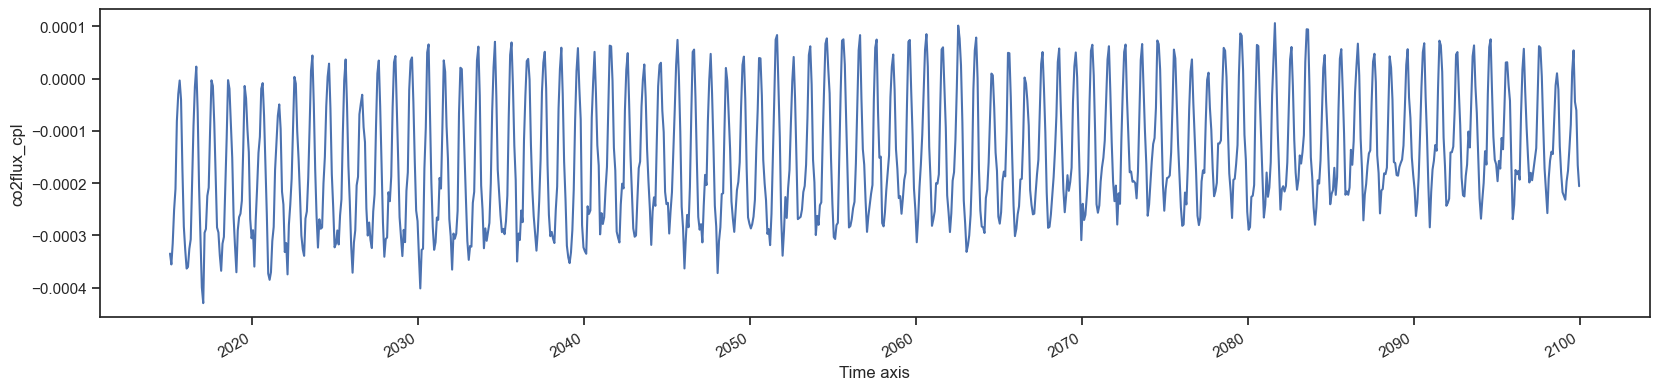

In [12]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

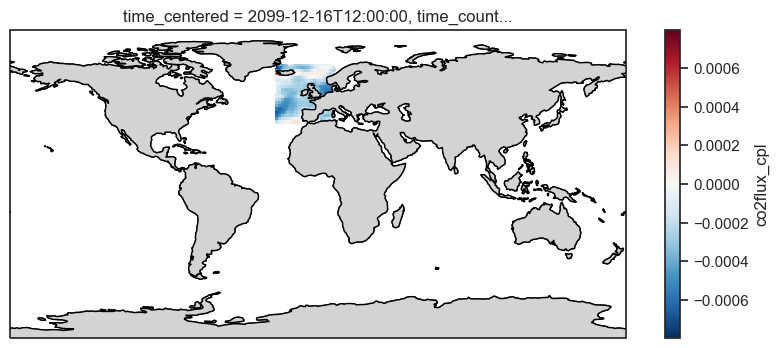

In [13]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

sliced_data.co2flux_cpl[1019].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()

Text(0.5, 1.02, 'CO2 seasonal flux')

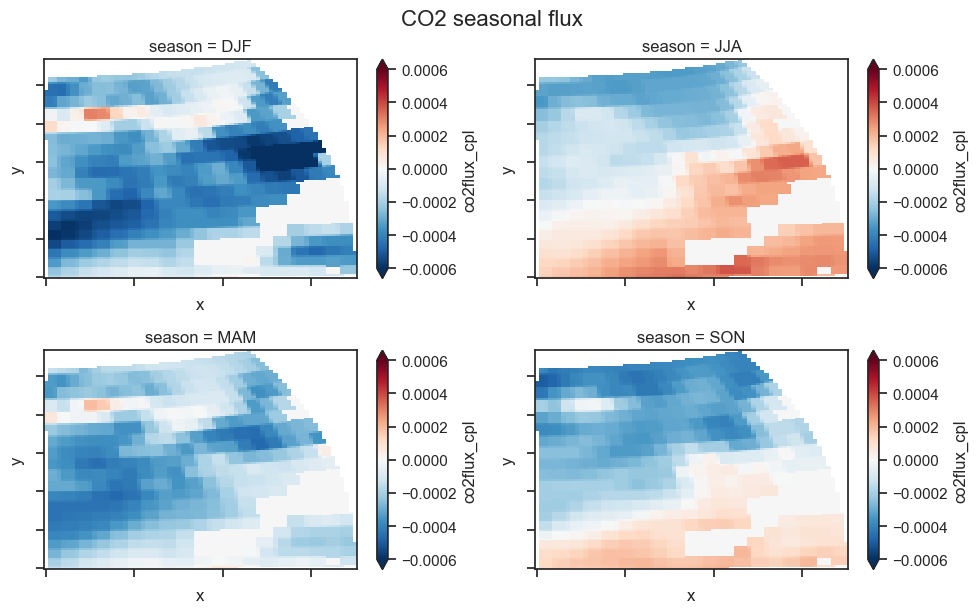

In [14]:
# regional mean from 2015 to 2100

ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.0006, vmax=0.0006, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 seasonal flux', fontsize=16, y=1.02)

In [12]:
sliced_data['co2flux_cpl'] = sliced_data['co2flux_cpl'] * 365 # kg / m-2 / yr-1

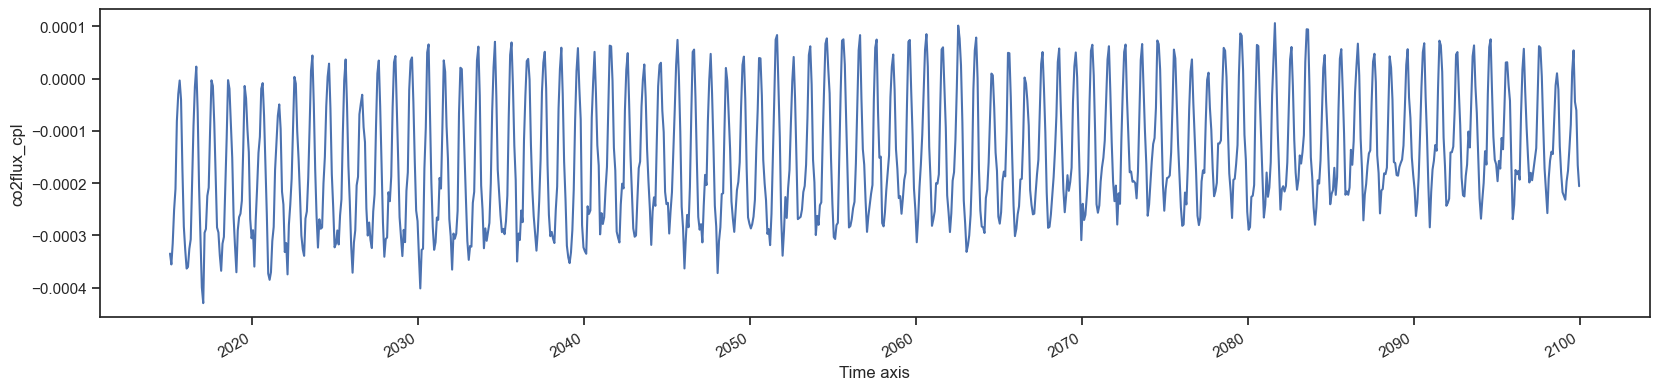

In [15]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

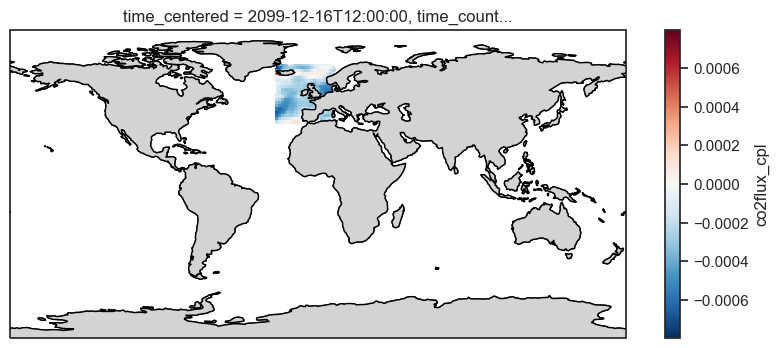

In [16]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

sliced_data.co2flux_cpl[1019].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()